## Importing Libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sb
import pandas as pd

## Reading Some Graphs

In [2]:
gEmailEn = nx.read_edgelist('./Email-Enron.txt', comments="#", delimiter="\t", create_using=nx.Graph())
gAstroPh = nx.read_edgelist('./CA-AstroPh.txt', comments='#', delimiter='\t', create_using=nx.Graph())

## Node Degree

The node degree corresponds to the amount of neighbors that is linked to a node. It varies according to the following two properties:
* Undirected Graph: Is the amount of edges that connect a node $k_{i}$ to its neighbors.
* Directed Graph: Is the amount of incoming and outgoing edges of a Node. Thus, the degree of a node $k_i$ is $k_{i}^{out}+k_{i}^{in}$.

To retrieve the degree of each node is quite simple using networkx, the only thing necessary is to call the builtin function `networkx.degree()` in the library. The function receives as argument a graph and as a result returns a dictionary containing the degree of each node.

In [ ]:
degreeEm = pd.DataFrame(pd.Series(nx.degree(gEmailEn)), columns=["Degree"])
degreeAs = pd.DataFrame(pd.Series(nx.degree(gAstroPh)), columns=["Degree"])

The degree distribution of a node denotes the number of k-degree nodes in a network. The easiest way of showing the distribution is plotting the histogram for the degrees. 

As we can see bellow, the node distribution for the Graph Email Enron shows that the higher percentage of nodes have a degree in the range $\left[0, 150\right]$. It's also possible to observe that the amount of nodes with degree in the range $\left[1250, 1400\right]$ is higher than the amount of nodes in the range $\left[1100, 1250\right)$.

In contrast to the graph Email Enron, the distribution for the Astro Ph. graph shows that the higher percentage of nodes have a degree in the range $\left[0, 50\right]$.

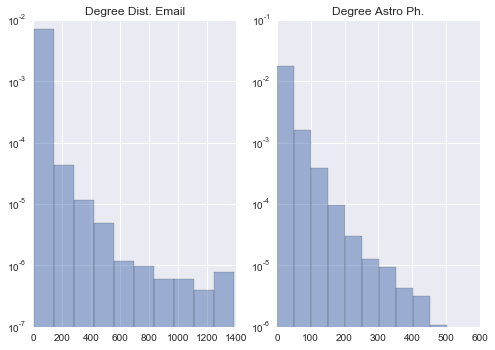

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(degreeEm['Degree'], alpha=0.5, normed=True, stacked=True, log=True)
ax[0].set_title('Degree Dist. Email')
ax[1].hist(degreeAs['Degree'], alpha=0.5, normed=True, stacked=True, log=True)
ax[1].set_title('Degree Astro Ph.')

## Clustering Coefficients

The clustering coefficient captures the degree to which the neighbors of a given node link to each other. In other words, for unweighted graphs, the degree of a node $\textit{u}$ is the fraction of possible triangles through that node that exist. In `networkx`, the following equations is used:
<center>$c_{u} = \frac{2T(u)}{deg(u)(deg(u) - 1)}$</center>
where $T(u)$ is the number of triangles through


In [6]:
clusteringEm = nx.clustering(gEmailEn)
clusteringAs = nx.clustering(gAstroPh)

In [7]:
clusteringEm = pd.DataFrame(pd.Series(clusteringEm), 
                            columns=["Clust.Coeff."])
clusteringAs = pd.DataFrame(pd.Series(clusteringAs), 
                            columns=["Clust.Coeff."])

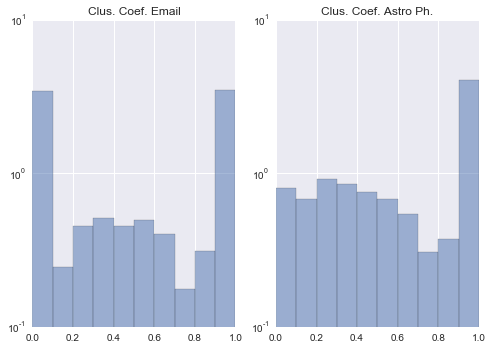

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(clusteringEm['Clust.Coeff.'], normed=True, alpha=0.5, log=True)
ax[0].set_title('Clus. Coef. Email')
ax[1].hist(clusteringAs['Clust.Coeff.'], normed=True, alpha=0.5, log=True)
ax[1].set_title('Clus. Coef. Astro Ph.')

## Number of Connected Components and Their Sizes

In [9]:
number_components_em = nx.number_connected_components(gEmailEn)
number_components_as = nx.number_connected_components(gAstroPh)

In [10]:
print("Number Components Email Enron:", number_components_em)
print("Number Components Astro Ph.:", number_components_as)

Number Components Email Enron: 1065
Number Components Astro Ph.: 290


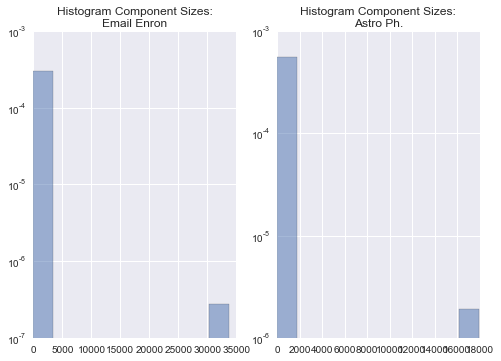

In [11]:
con_comp_em = list(nx.connected_component_subgraphs(gEmailEn))
con_comp_as = list(nx.connected_component_subgraphs(gAstroPh))
scon_comp_em = [nx.number_of_nodes(con_comp_em[x])  for x in range(0, len(con_comp_em), 1)]
scon_comp_as = [nx.number_of_nodes(con_comp_as[x])  for x in range(0, len(con_comp_as), 1)]
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(scon_comp_em, normed=True, stacked=True, log=True,  alpha=0.5)
ax[0].set_title('Histogram Component Sizes:\nEmail Enron')
ax[1].hist(scon_comp_as, normed=True, stacked=True, log=True,  alpha=0.5)
ax[1].set_title('Histogram Component Sizes:\nAstro Ph.')

In [12]:
betweenness_centrality_em = nx.betweenness_centrality(gEmailEn)
betweenness_centrality_as = nx.betweenness_centrality(gAstroPh)

In [14]:
bet_centrality_ca = pd.DataFrame(pd.Series(betweenness_centrality_am), columns=["Bet.Centrality"])
bet_centrality_tx = pd.DataFrame(pd.Series(betweenness_centrality_as), columns=['Bet.Centrality'])

NameError: name 'betweenness_centrality_am' is not defined

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(bet_centrality_ca['Bet.Centrality'], normed=True, log=True, stacked=True, alpha=0.5)
ax[0].set_title("Betweenness Centrality\nCalifornia")
ax[1].hist(bet_centrality_tx['Bet.Centrality'], normed=True, log=True, stacked=True, alpha=0.5)
ax[1].set_title("Betweenness Centrality\nTexas")

# Closeness Centrality

In [ ]:
closenness_centrality_ca = nx.closeness_centrality(gRoadNetCa)
closenness_centrality_tx = nx.closeness_centrality(gRoadNetTx)